In [18]:
# Perform EDA and Preprocessing 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

df_telco = pd.read_csv(r"D:\Rehan Working\Working\Datasets\Telco-Customer-Churn.csv")
df_telco.head(3)
df_telco.drop(columns=['customerID'], inplace=True)


# Encode Categorical Variable
le = LabelEncoder()
df_telco["Churn"] = le.fit_transform(df_telco['Churn'])

# One-hot encode categorical features
df_telco = pd.get_dummies(df_telco, drop_first=True)

# Define Features and Target
X = df_telco.drop(columns= ['Churn'])
y = df_telco['Churn']

# scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
print(df_telco.info())
print(df_telco.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Columns: 6560 entries, SeniorCitizen to TotalCharges_999.9
dtypes: bool(6556), float64(1), int64(3)
memory usage: 44.2 MB
None
       SeniorCitizen       tenure  MonthlyCharges        Churn
count    7043.000000  7043.000000     7043.000000  7043.000000
mean        0.162147    32.371149       64.761692     0.265370
std         0.368612    24.559481       30.090047     0.441561
min         0.000000     0.000000       18.250000     0.000000
25%         0.000000     9.000000       35.500000     0.000000
50%         0.000000    29.000000       70.350000     0.000000
75%         0.000000    55.000000       89.850000     1.000000
max         1.000000    72.000000      118.750000     1.000000


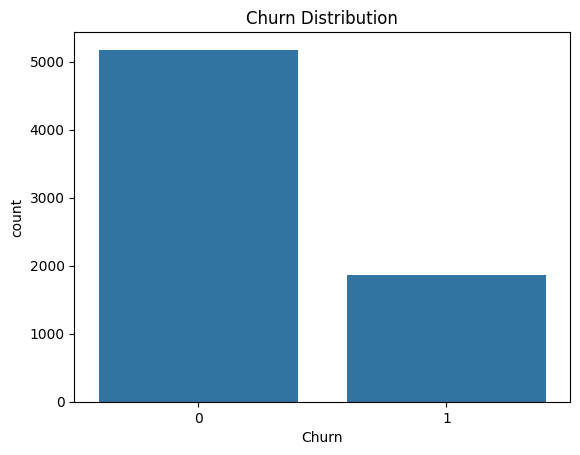

In [20]:
# Visualize Churn Distribution
sns.countplot(x='Churn', data=df_telco)
plt.title("Churn Distribution")
plt.show()

### Fit and Evaluate Multiple Model

In [21]:
# Logistic Regression
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)

# k-NN Regression
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Make Prediction
y_pred_log = log_model.predict(X_test)
y_pred_knn = knn.predict(X_test)

# Display Evaluation
print("\nLogistic Regression Clasification Report: \n", classification_report(y_test, y_pred_log))
print("\nk-NN Regression Classification Report: \n", classification_report(y_test, y_pred_knn))

# Confusion Matrix for Logistic Regression
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_log))


Logistic Regression Clasification Report: 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.59      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409


k-NN Regression Classification Report: 
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      1036
           1       0.25      0.00      0.01       373

    accuracy                           0.73      1409
   macro avg       0.49      0.50      0.43      1409
weighted avg       0.61      0.73      0.62      1409

Confusion Matrix: 
 [[883 153]
 [157 216]]
